Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: -9.9767 - accuracy: 0.3665 - val_loss: -19.1856 - val_accuracy: 0.6061
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: -26.7389 - accuracy: 0.4861 - val_loss: -29.4292 - val_accuracy: 0.3182
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: -34.8937 - accuracy: 0.3785 - val_loss: -43.6812 - val_accuracy: 0.4848
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: -48.1121 - accuracy: 0.4462 - val_loss: -51.7491 - val_accuracy: 0.5303
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: -50.1283 - accuracy: 0.4701 - val_loss: -62.4189 - val_accuracy: 0.3333
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: -59.7903 - accuracy: 0.4462 - val_loss: -72.1558 - val_accuracy: 0.3182
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: -73.

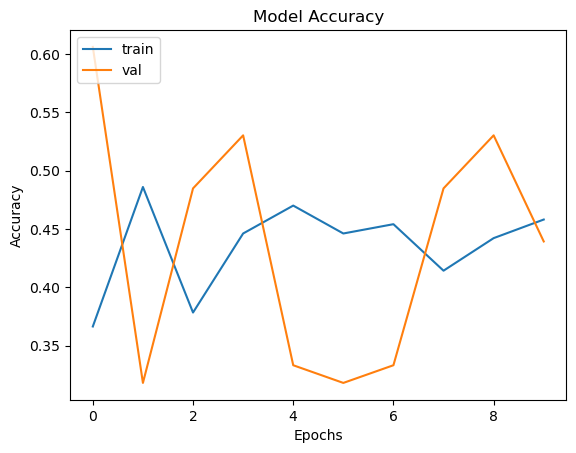

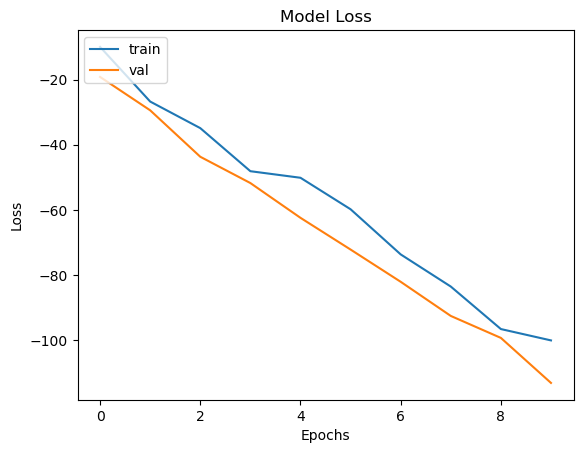

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt


dataset_dir = r'C:\Users\weije\Desktop\Kaggle Data\Covid19-dataset'

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r'C:\Users\weije\Desktop\Kaggle Data\Covid19-dataset\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=r'C:\Users\weije\Desktop\Kaggle Data\Covid19-dataset\test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))


model.add(Dense(3, activation='softmax'))
model = Sequential()
model.add(layers.Input(shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
epochs = 10 
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

